In [1]:
# import packages
import netrd.distance
import matplotlib.pyplot as plt
import networkx as nx
import polars as pl
from networkx.algorithms import bipartite

In [2]:
# load and process data for primates
df_primates = pl.read_csv("/Users/tanveegupta/Downloads/hosts.csv", encoding="utf8-lossy", ignore_errors=True, null_values=["NA", ""], infer_schema_length=0)
filtered_primates = df_primates.filter(
    (pl.col("hOrder") == "PRIMATES") &
    (pl.col("hHostNameFinal") != "Homo_sapiens") #excluding humans cuz it's a huge outlier
)

df_associations = df = pl.read_csv("/Users/tanveegupta/Downloads/associations.csv", encoding="utf8-lossy", ignore_errors=True, null_values=["NA", ""], infer_schema_length=0)

filtered_primate_list = filtered_primates["hHostNameFinal"].to_list()
df2_ape = df_associations.filter(pl.col("hHostNameFinal").is_in(filtered_primate_list))

filtered_df2_ape = df2_ape.select(["hHostNameFinal", "vVirusNameCorrected", "DetectionQuality"])

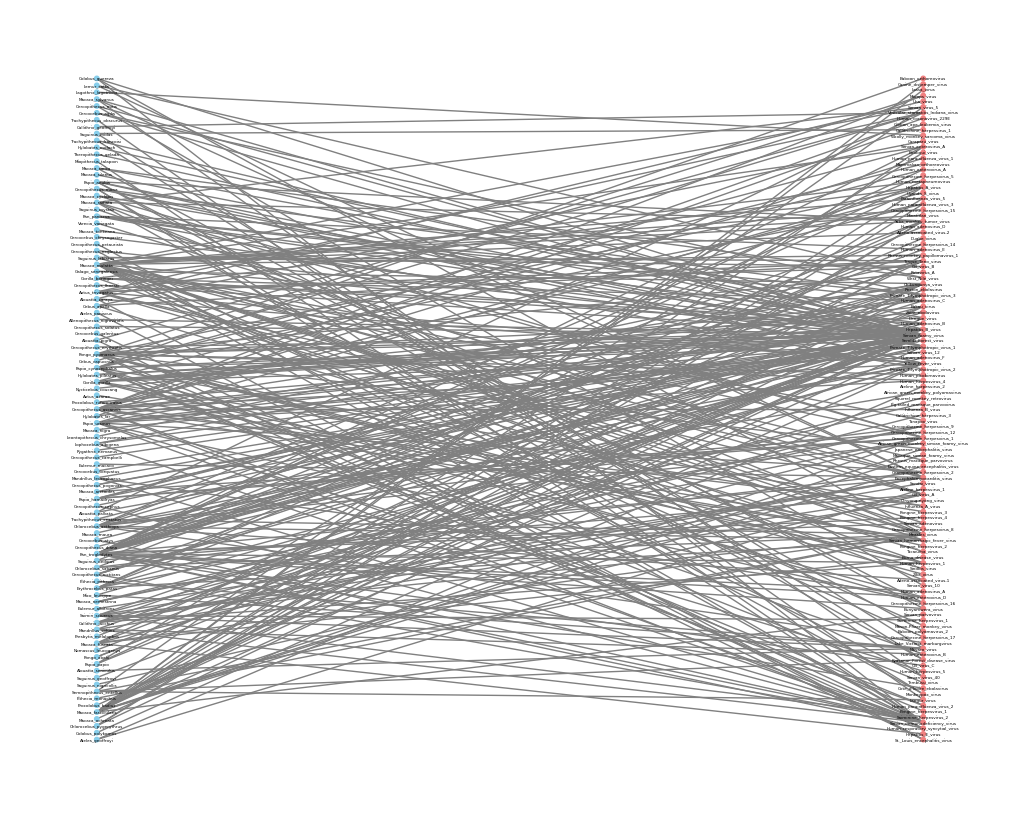

In [3]:
# make primate graph
G_ape = nx.Graph()
G_ape.add_nodes_from(df2_ape["hHostNameFinal"], bipartite=0) 
G_ape.add_nodes_from(df2_ape["vVirusNameCorrected"], bipartite=1)
edge_list_ape = df2_ape.select(["hHostNameFinal", "vVirusNameCorrected"]).rows()
G_ape.add_edges_from(edge_list_ape)

hosts_ape = df2_ape["hHostNameFinal"].unique().to_list()
viruses_ape = df2_ape["vVirusNameCorrected"].unique().to_list()

pos_ape = nx.bipartite_layout(G_ape, hosts_ape)
plt.figure(figsize=(10, 8))
nx.draw(
    G_ape,
    pos_ape,
    with_labels=True,
    node_color=["skyblue" if n in hosts_ape else "lightcoral" for n in G_ape.nodes()],
    node_size=10,
    edge_color="gray",
    font_size=3
)

In [5]:
# load and process rodent data
df_rodents = pl.read_csv("/Users/tanveegupta/Downloads/hosts.csv", encoding="utf8-lossy", ignore_errors=True, null_values=["NA", ""], infer_schema_length=0)
filtered_rodent = df_rodents.filter(pl.col("hOrder") == "RODENTIA")

filtered_rodent_list = filtered_rodent["hHostNameFinal"].to_list()
df2_rodent = df_associations.filter(pl.col("hHostNameFinal").is_in(filtered_rodent_list))

filtered_df2_rat = df_associations.select(["hHostNameFinal", "vVirusNameCorrected", "DetectionQuality"])

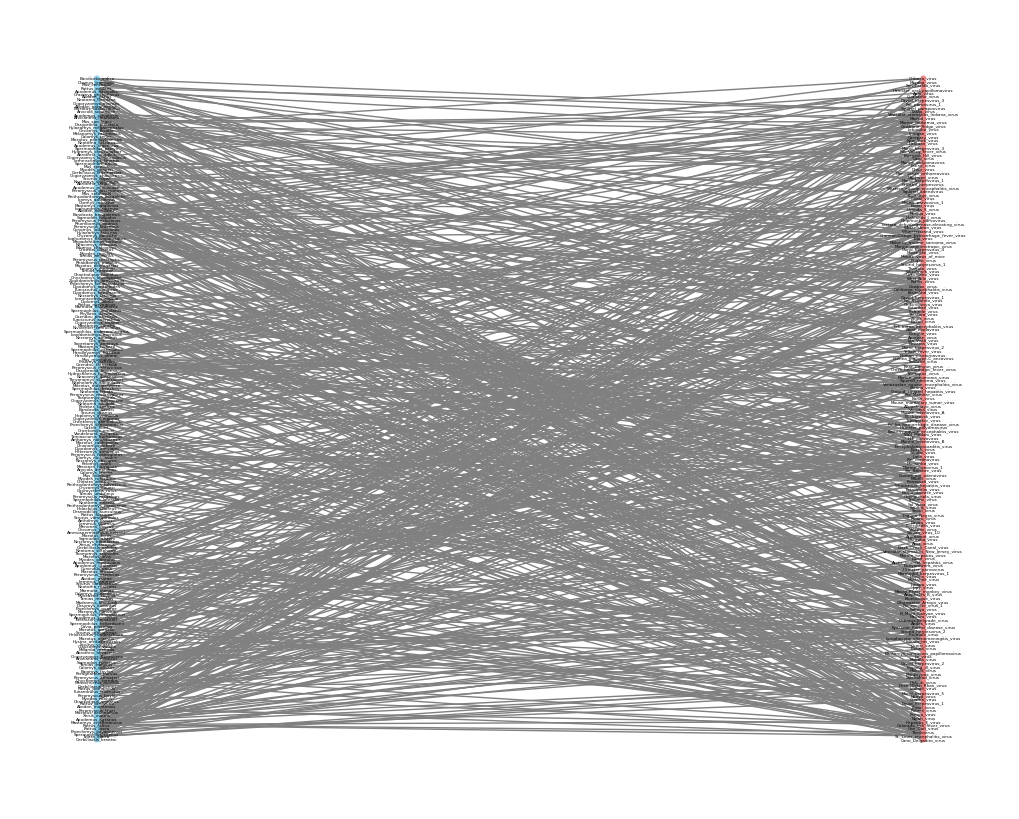

In [6]:
# make rodent graph
G_rat = nx.Graph()
G_rat.add_nodes_from(df2_rodent["hHostNameFinal"], bipartite=0) 
G_rat.add_nodes_from(df2_rodent["vVirusNameCorrected"], bipartite=1)
edge_list_rat = df2_rodent.select(["hHostNameFinal", "vVirusNameCorrected"]).rows()
G_rat.add_edges_from(edge_list_rat)


hosts_rat = df2_rodent["hHostNameFinal"].unique().to_list()
viruses_rat = df2_rodent["vVirusNameCorrected"].unique().to_list()

pos_rat = nx.bipartite_layout(G_rat, hosts_rat)
plt.figure(figsize=(10, 8))
nx.draw(
    G_rat,
    pos_rat,
    with_labels=True,
    node_color=["skyblue" if n in hosts_rat else "lightcoral" for n in G_rat.nodes()],
    node_size=10,
    edge_color="gray",
    font_size=3
)

In [9]:
# find network distance
dd_dist_calc = netrd.distance.DegreeDivergence()
dd_distance = dd_dist_calc.dist(G_ape, G_rat)
print(f"degree divergence is {dd_distance}")

dk_dist_calc = netrd.distance.dkSeries()
dk_distance = dk_dist_calc.dist(G_ape, G_rat)
print(f"dk series distance is {dk_distance}")

im_dist_calc = netrd.distance.IpsenMikhailov()
im_distance = im_dist_calc.dist(G_ape, G_rat)
print(f"Ipsen Mikhailov distance is {im_distance}")

nbs_dist_calc = netrd.distance.NonBacktrackingSpectral()
nbs_distance = nbs_dist_calc.dist(G_ape, G_rat)
print(f"spectral distribution distance is {nbs_distance}")

pd_dist_calc = netrd.distance.PortraitDivergence()
pd_distance = pd_dist_calc.dist(G_ape, G_rat)
print(f"portrait divergence is {pd_distance}")

degree divergence is 0.0321334706318608
dk series distance is 0.4253359926831946
Ipsen Mikhailov distance is 0.18917350426854856
spectral distribution distance is 0.719131141792206
portrait divergence is 0.5948040018857803
